Link to the dataset: https://drive.google.com/drive/folders/1H6MhJefZ7DlNZ_yhkIyaoennSQvyonRR?usp=sharing

In [1]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [4]:
data_path = fr'./demo/AnimalFace/Image'
os.listdir(data_path)

['WolfHead',
 'SheepHead',
 'LionHead',
 'EagleHead',
 'ChickenHead',
 'BearHead',
 'ElephantHead',
 'DeerHead',
 'DogHead',
 'PandaHead',
 'MouseHead',
 'HumanHead',
 'PigeonHead',
 'CowHead',
 'RabbitHead',
 'DuckHead',
 'MonkeyHead',
 'TigerHead',
 'Natural',
 'CatHead',
 'PigHead']

In [5]:
base_name = 'animal_faces'
width = 80
 
include = {'ChickenHead', 'BearHead', 'ElephantHead', 
           'EagleHead', 'DeerHead', 'MonkeyHead', 'PandaHead'}
 
resize_all(src=data_path, pklname=base_name, width=width, include=include)


EagleHead
ChickenHead
BearHead
ElephantHead
DeerHead
PandaHead
MonkeyHead


In [5]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

NameError: name 'base_name' is not defined

197 Bear
97 Chicken
398 Deer
0 Eagle
298 Elephant
616 Monkey
499 Panda


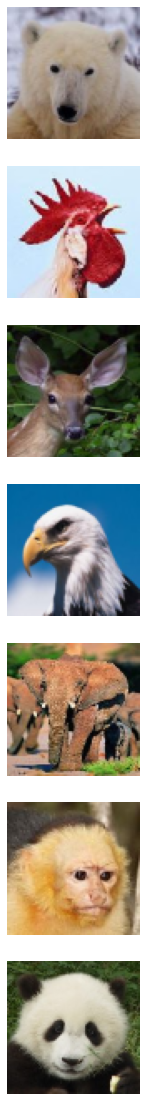

In [34]:
# use np.unique to get all unique values in the list of labels

### YOUR CODE GOES HERE
uLables = np.unique(data['label'])

# set up the matplotlib figure and axes, based on the number of labels
### YOUR CODE GOES HERE
num = uLables.shape[0]
fig, ax = plt.subplots(num,figsize=(20,20))
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case

### YOUR CODE GOES HERE
for i in range(num):
    ind = np.where(np.array(data['label']) == uLables[i])[0][0]
    print(ind,data['label'][ind])
    ax[i].imshow(data['data'][ind])
    ax[i].axis('off')
#     ax[i].figure()

In [3]:
# get the data and labels from pickle object
### YOUR CODE GOES HERE
# tempx = 

data = joblib.load(f'animal_faces_80x80px.pkl')
x_total = data['data']
y_total = data['label']



In [4]:
from sklearn.model_selection import train_test_split
#split the data into train and test set
### YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(
    x_total, y_total, test_size=0.2, random_state=42, stratify=y_total)

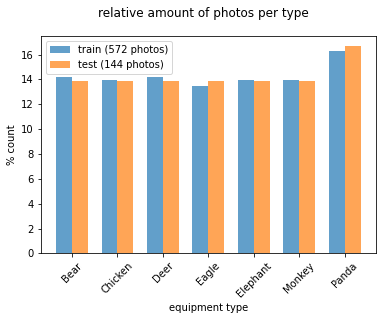

In [5]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

(162, 194)


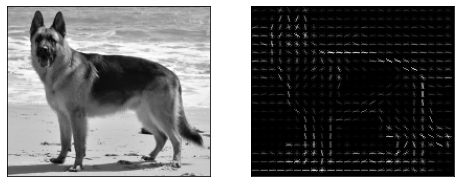

In [6]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
dog = imread('./demo/German_Shepherd.jpg', as_gray=True)
# https://en.wikipedia.org/wiki/German_Shepherd#/media/File:Kim_at_14_weeks.jpg
 
# scale down the image to one third
dog = rescale(dog, 1/3, mode='reflect')
print(dog.shape)
# calculate the hog and return a visual representation.
### YOUR CODE GOES HERE
_, hog_image = hog(dog,visualize=True)
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]

# Create a subplot and plot original image and HOG image
### YOUR CODE GOES HERE
ax[0].imshow(dog,cmap='gray')
ax[1].imshow(hog_image, cmap='gray')
dog_hog = hog_image

In [7]:
print('number of pixels: ', dog.shape[0] * dog.shape[1])
print('number of hog features: ', dog_hog.shape[0])

number of pixels:  31428
number of hog features:  162


In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [9]:
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
from sklearn.pipeline import Pipeline
 
# create an instance of each transformer
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 
'''
call fit_transform on each transform converting X_train step by step first convert RGB2Gray, 
then calculate HOG features and finally scale the images
'''
### YOUR CODE GOES HERE
pipe = Pipeline([('a',grayify), ('b',hogify),('c',scalify),('d',
                                                            SGDClassifier(random_state=42))])
pipe1 = Pipeline([('a',grayify), ('b',hogify),('c',scalify),
                  ('d',MLPClassifier(random_state=42,
                                     learning_rate='adaptive',max_iter=50,
                                     hidden_layer_sizes=(250,400)))])
pipe2 = Pipeline([('a',grayify), ('b',hogify),('c',scalify),
                  ('d',MLPClassifier(random_state=42
                                     ,max_iter=400,
                                     hidden_layer_sizes=(256,256)))])

In [10]:
# Prepare test data by applying same transforms as train data

### YOUR CODE GOES HERE
pipe.fit(X_train, y_train)
pipe1.fit(X_train, y_train)
pipe2.fit(X_train, y_train)
print(pipe.score(X_test, y_test), pipe1.score(X_test, y_test),pipe2.score(X_test, y_test))

0.9305555555555556 0.9375 0.9097222222222222


In [11]:
print(np.array(X_test).shape)

(144, 80, 80, 3)


In [12]:
from torchvision.models import resnet50, ResNet50_Weights
import torch

model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
weights = ResNet50_Weights.DEFAULT
preprocess = weights.transforms()
testset = torch.tensor(X_test)
testset = torch.movedim(testset, 3, 1)
arr = preprocess(testset)


model.eval()
ans = model(arr)



/tmp/ipykernel_17860/1903307177.py:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  testset = torch.tensor(X_test)
/home/kyrylo/.local/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to w

capuchin: 88.0%
Monkey


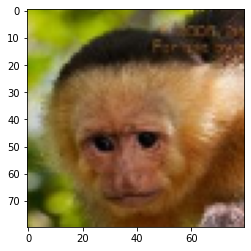

In [34]:
i = 24

prediction = ans[i].softmax(0)
class_id = prediction.argmax().item()
score = prediction[class_id].item()
category_name = weights.meta["categories"][class_id]
print(f"{category_name}: {100 * score:.1f}%")
print(y_test[i])
plt.imshow(X_test[i])


In [197]:
# Print the testing accuracy

### YOUR CODE GOES HERE
y_final = pipe1.predict(X_test)

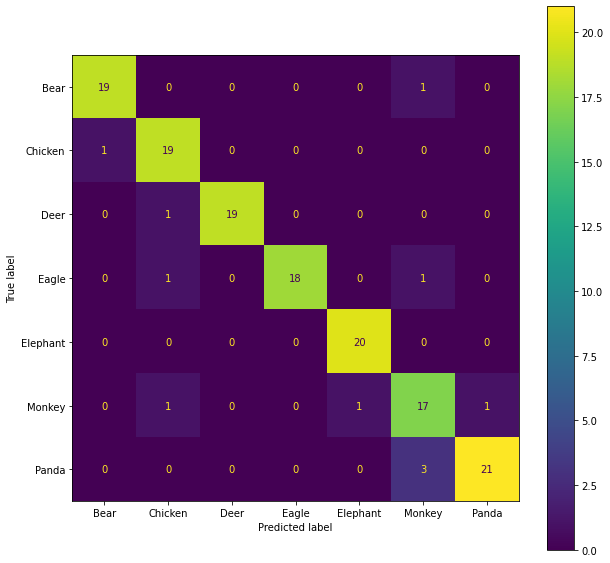

In [198]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
### YOUR CODE GOES HERE
# plt.figure(f)
_,ax = plt.subplots(figsize=(10,10))
cmx = ConfusionMatrixDisplay.from_estimator(pipe1, X_test, y_test,ax=ax)
cmx = confusion_matrix(y_test, y_final)

plt.show()


 ['Bear', 'Chicken', 'Deer', 'Eagle', 'Elephant', 'Monkey', 'Panda']


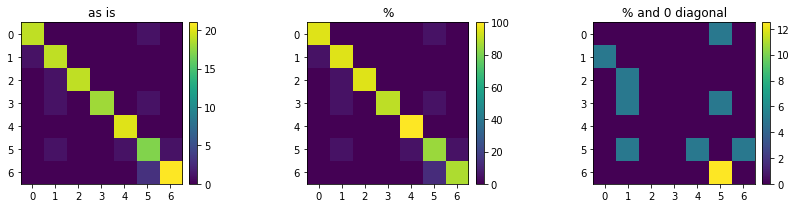

In [200]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
 
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()
 
    np.fill_diagonal(cmx_zero_diag, 0)
 
    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(len(cmx)+1)) for a in ax]
    [a.set_yticks(range(len(cmx)+1)) for a in ax]
         
    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')
 
    dividers = [make_axes_locatable(a) for a in ax]
    cax1, cax2, cax3 = [divider.append_axes("right", size="5%", pad=0.1) 
                        for divider in dividers]
 
    fig.colorbar(im1, cax=cax1)
    fig.colorbar(im2, cax=cax2)
    fig.colorbar(im3, cax=cax3)
    fig.tight_layout()
     
plot_confusion_matrix(cmx)
 
# the types appear in this order
print('\n', sorted(np.unique(y_test)))